In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [2]:
#load libraries
import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)
from datasets import load_dataset
# Read the file "data.csv" and print the contents.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# Id column is redundant and not useful, we want to drop it
df.drop('id', axis =1, inplace=True)
# df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [6]:
df.shape

(569, 31)

In [7]:
# Review data types with "info()".
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
# Check for missing variables
df.isnull().any()

,0
diagnosis,False
radius_mean,False
texture_mean,False
perimeter_mean,False
area_mean,False
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False
symmetry_mean,False


In [9]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [11]:
# Save the cleaner version of dataframe for future analyis
df.to_csv('/content/drive/MyDrive/Colab Notebooks/data_clean.csv')

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
import seaborn as sns # data visualization


plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['axes.titlesize'] = 'large'

In [17]:
# usind clean data with "id"
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_clean_id.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [15]:
#basic descriptive statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [20]:
# Group by diagnosis and review the output.
diag_gr = df.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

<ipython-input-20-8efc68fadf6b>:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  diag_gr = df.groupby('diagnosis', axis=0)


,# of observations
diagnosis,
B,357
M,212


<ipython-input-23-0f1200f3807c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['diagnosis'],label='Count',palette="Set3")


<Axes: xlabel='count', ylabel='diagnosis'>

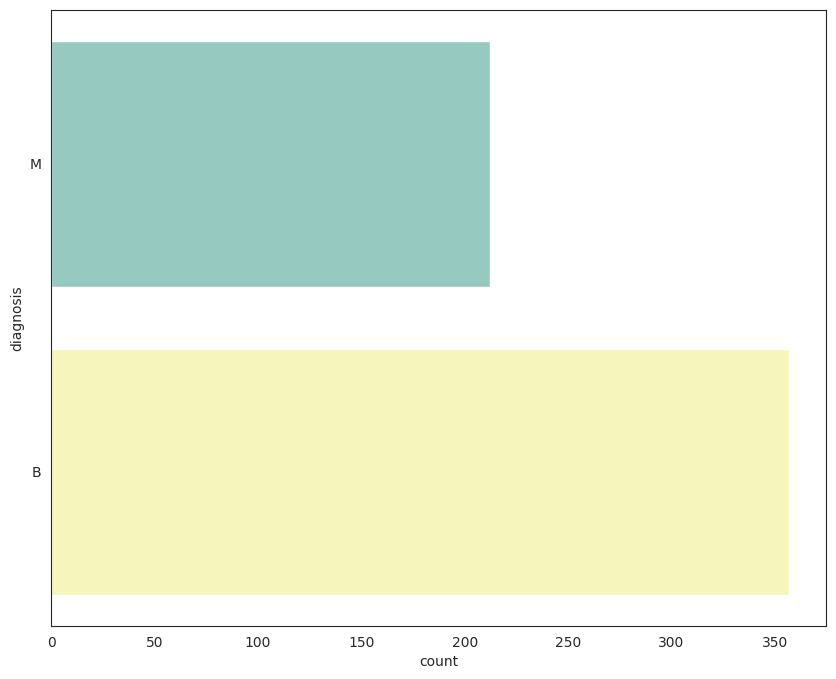

In [23]:
#lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(df['diagnosis'],label='Count',palette="Set3")

In [24]:
#Break up columns into groups, according to their suffix designation
#(_mean, _se,and __worst) to perform visualisation plots off.
#Join the 'ID' and 'Diagnosis' back on
df_id_diag=df.loc[:,["id","diagnosis"]]
df_diag=df.loc[:,["diagnosis"]]

#For a merge + slice:
df_mean=df.iloc[:,1:11]
df_se=df.iloc[:,11:22]
df_worst=df.iloc[:,23:]

print(df_id_diag.columns)
#print(data_mean.columns)
#print(data_se.columns)
#print(data_worst.columns)

Index(['id', 'diagnosis'], dtype='object')


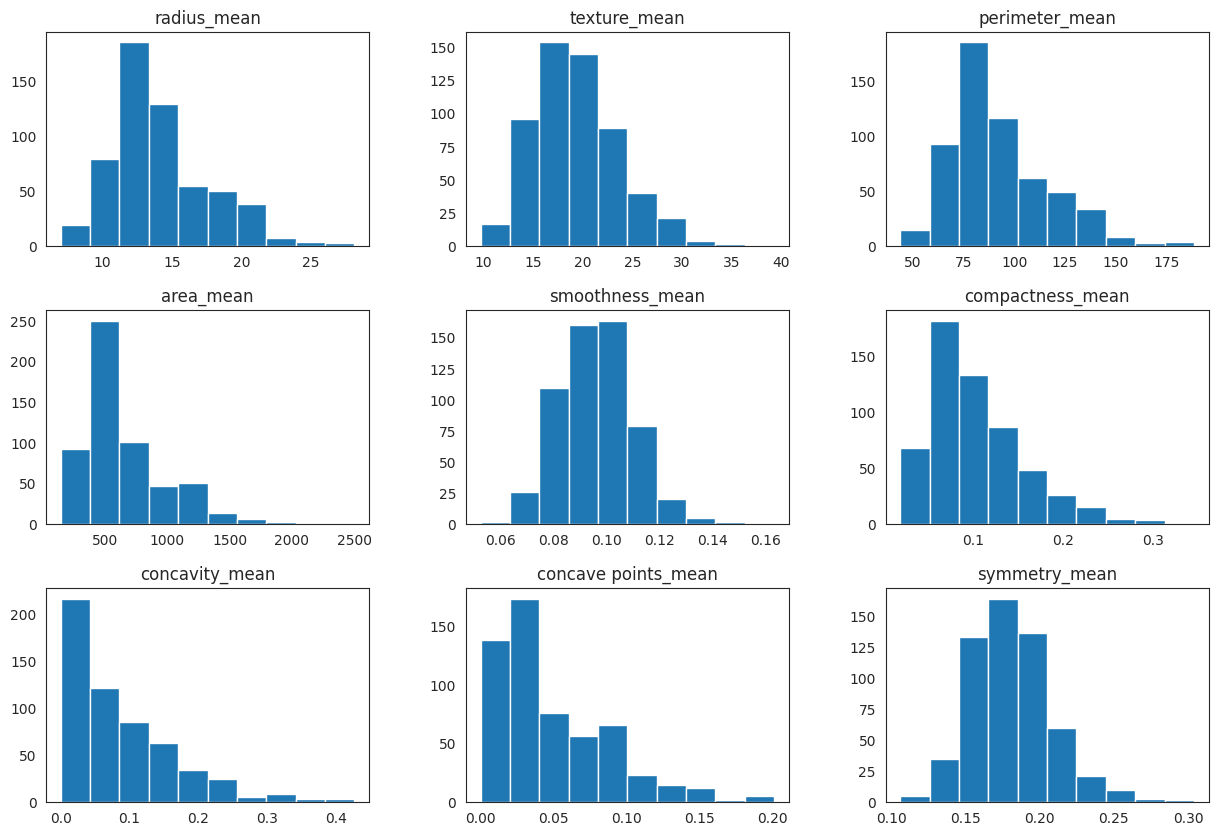

In [25]:
#Plot histograms of CUT1 variables
hist_mean=df_mean.hist(bins=10, figsize=(15, 10),grid=False,)

#Any individual histograms, use this:
#df_cut['radius_worst'].hist(bins=100)

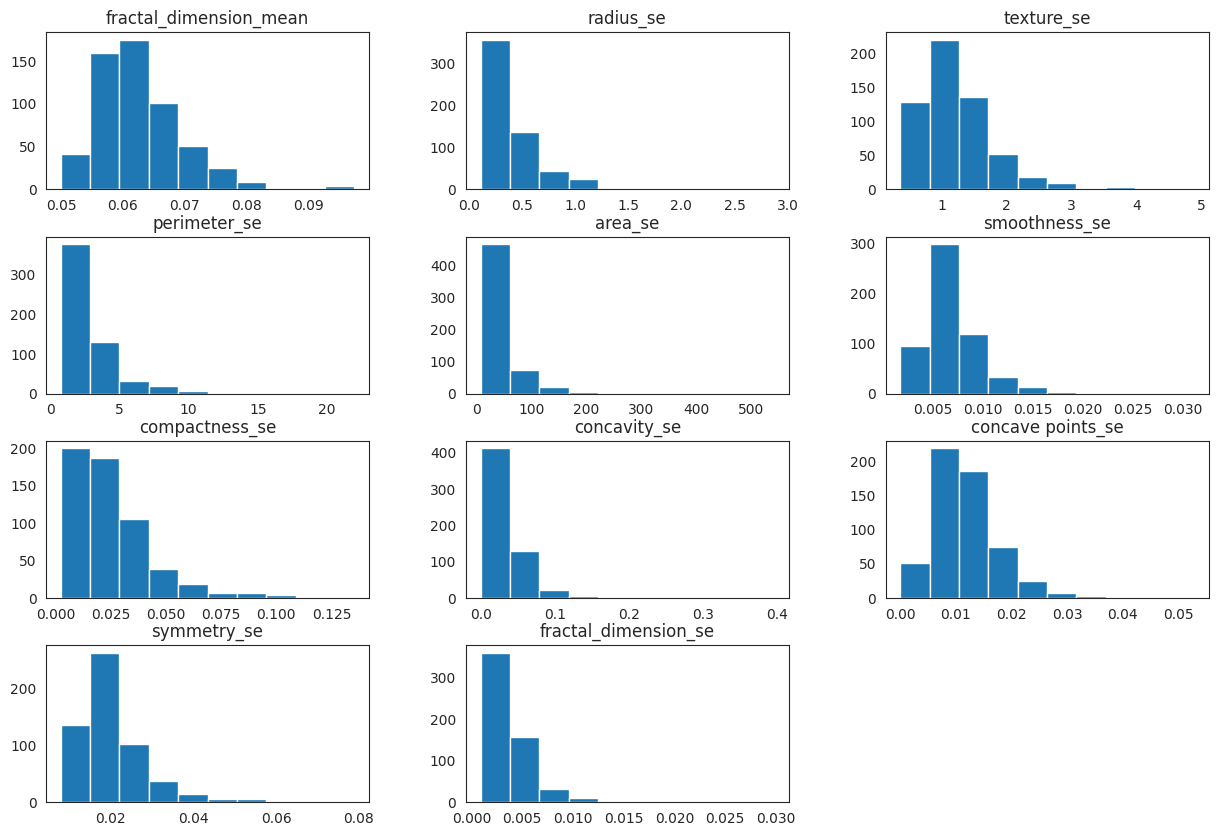

In [26]:
#Plot histograms of _se variables
hist_se=df_se.hist(bins=10, figsize=(15, 10),grid=False,)

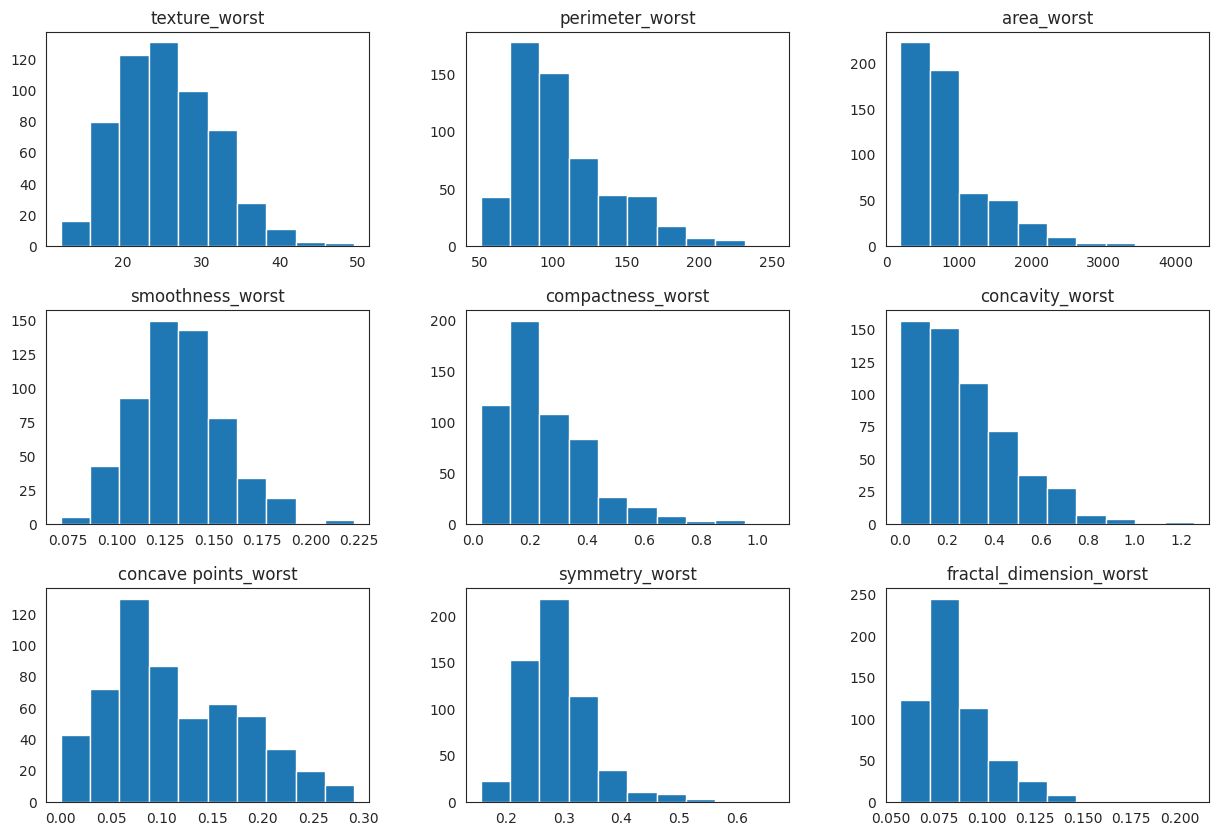

In [27]:
#Plot histograms of _worst variables
hist_worst=df_worst.hist(bins=10, figsize=(15, 10),grid=False,)

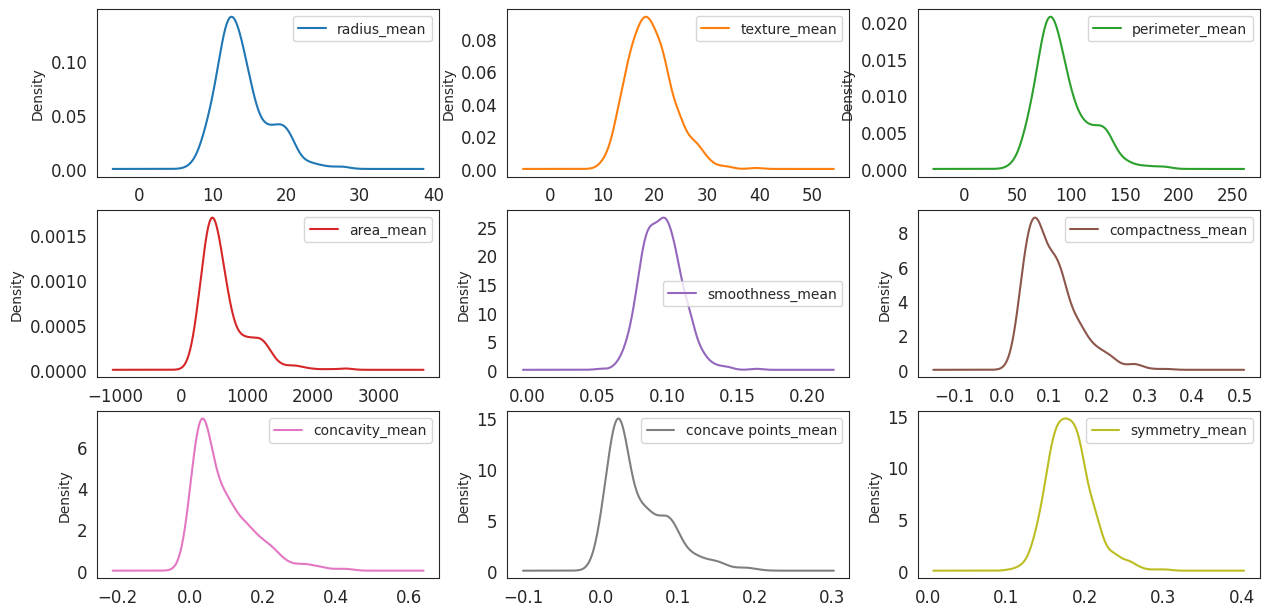

In [28]:
#Density Plots
plt = df_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                     sharey=False, fontsize=12, figsize=(15,10))

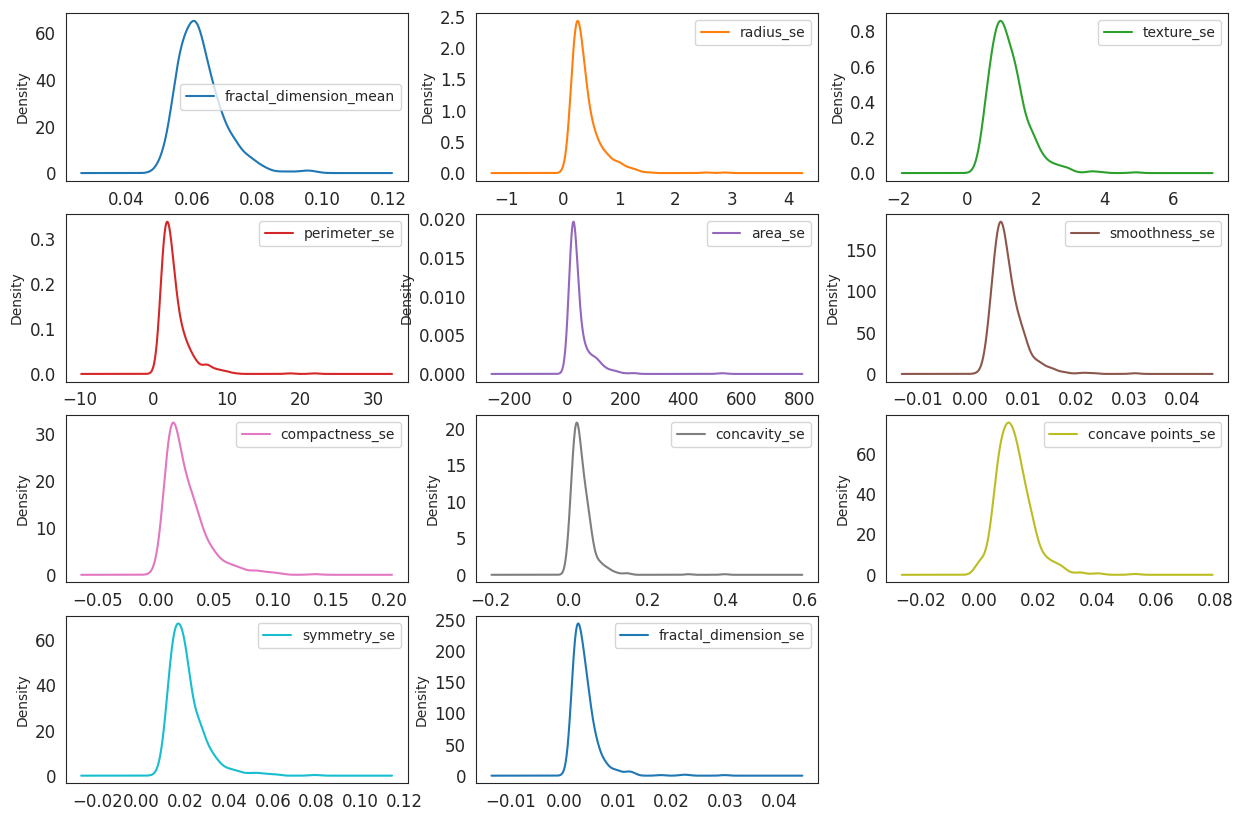

In [29]:
#Density Plots
plt = df_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                    sharey=False, fontsize=12, figsize=(15,10))

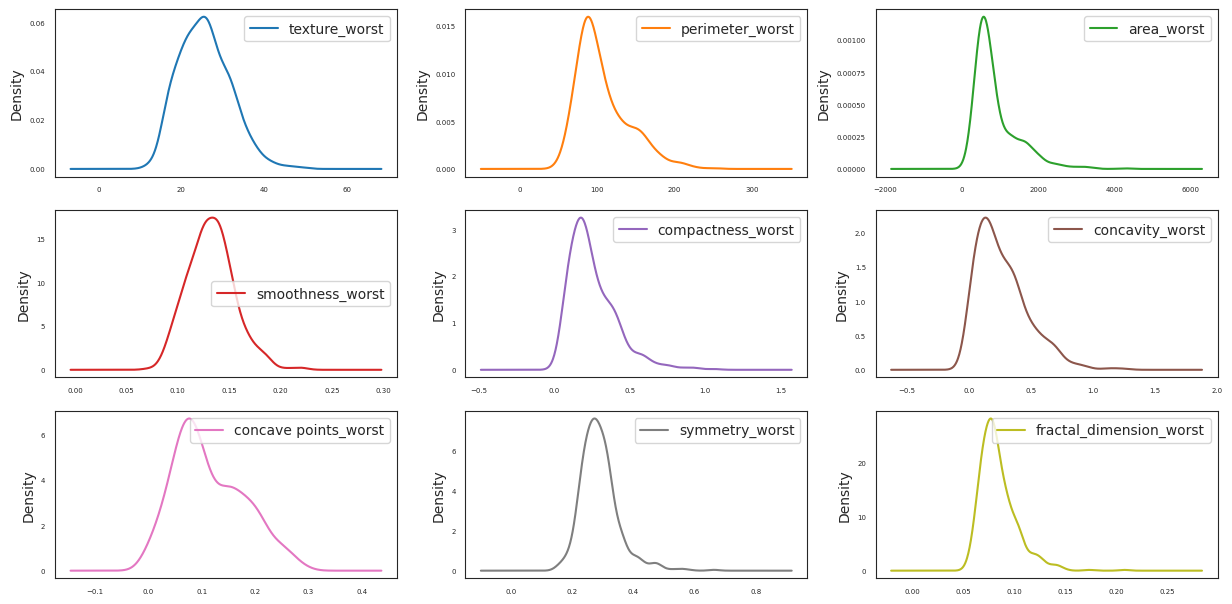

In [30]:
#Density Plots
plt = df_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,
                    fontsize=5, figsize=(15,10))

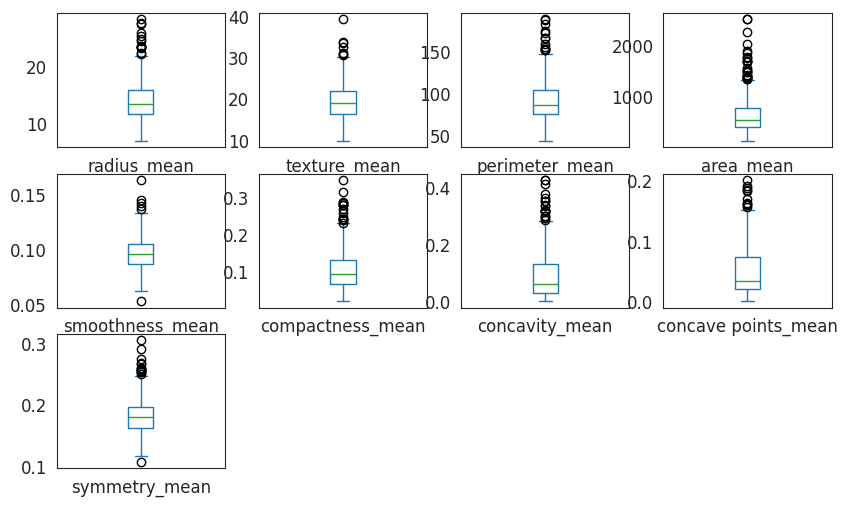

In [31]:
# box and whisker plots
plt=df_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                 fontsize=12)

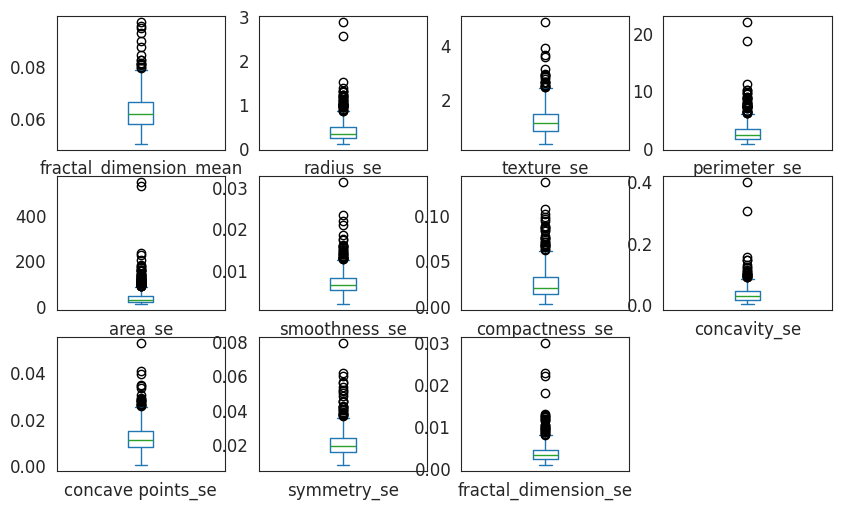

In [32]:
# box and whisker plots
plt=df_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
               fontsize=12)

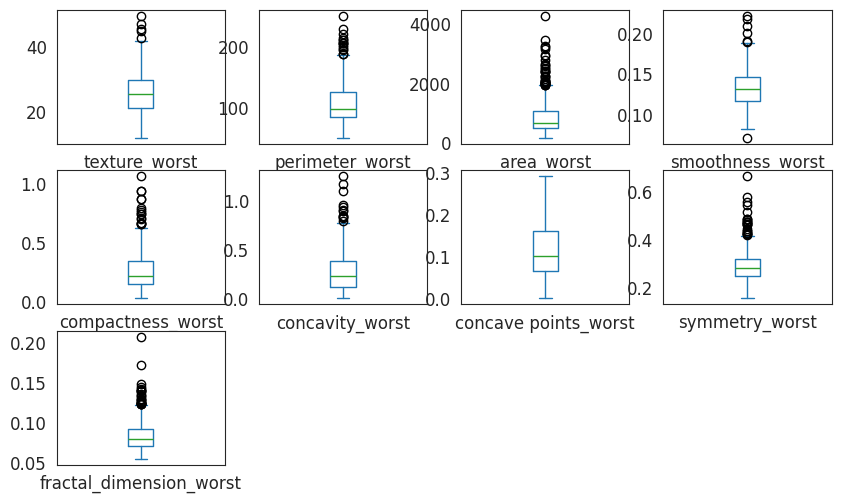

In [33]:
# box and whisker plots
plt=df_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                  fontsize=12)

<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

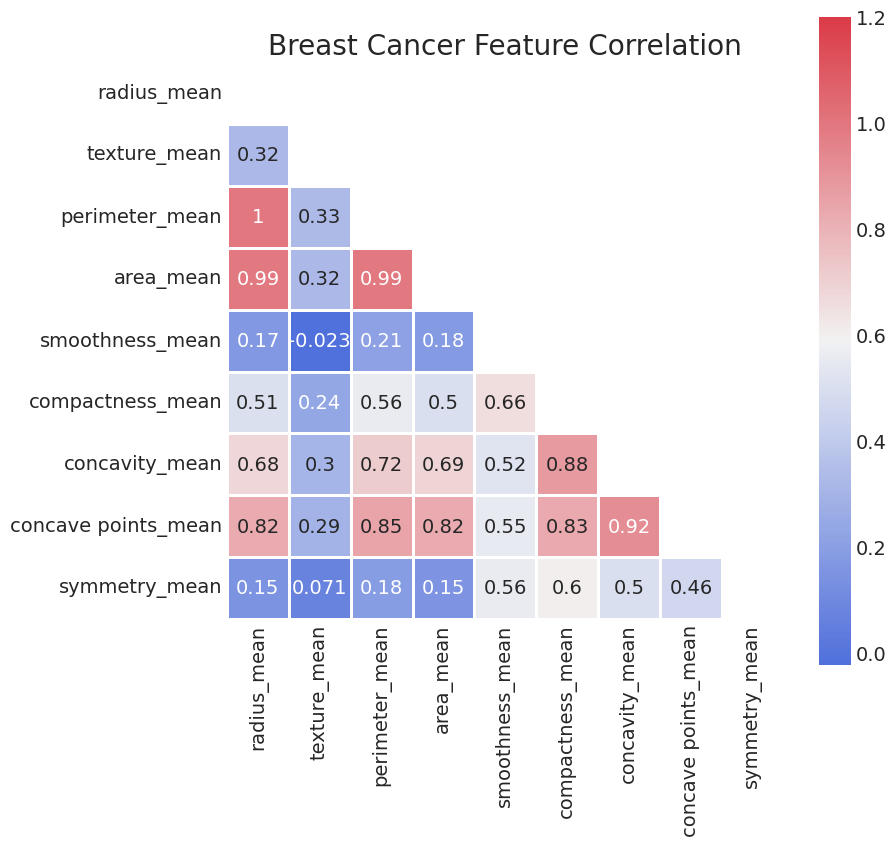

In [38]:
# plot correlation matrix
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_clean.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)

# Select only numeric features for correlation analysis
numeric_features = df_mean.select_dtypes(include=np.number)

# Compute the correlation matrix using only numeric features
corr = numeric_features.corr()

# Generate a mask for the upper triangle
# Use bool instead of the deprecated np.bool
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 8)) # Changed df to fig to avoid overwriting the DataFrame
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask,
            ax=ax,annot=True, fmt='.2g',linewidths=2)

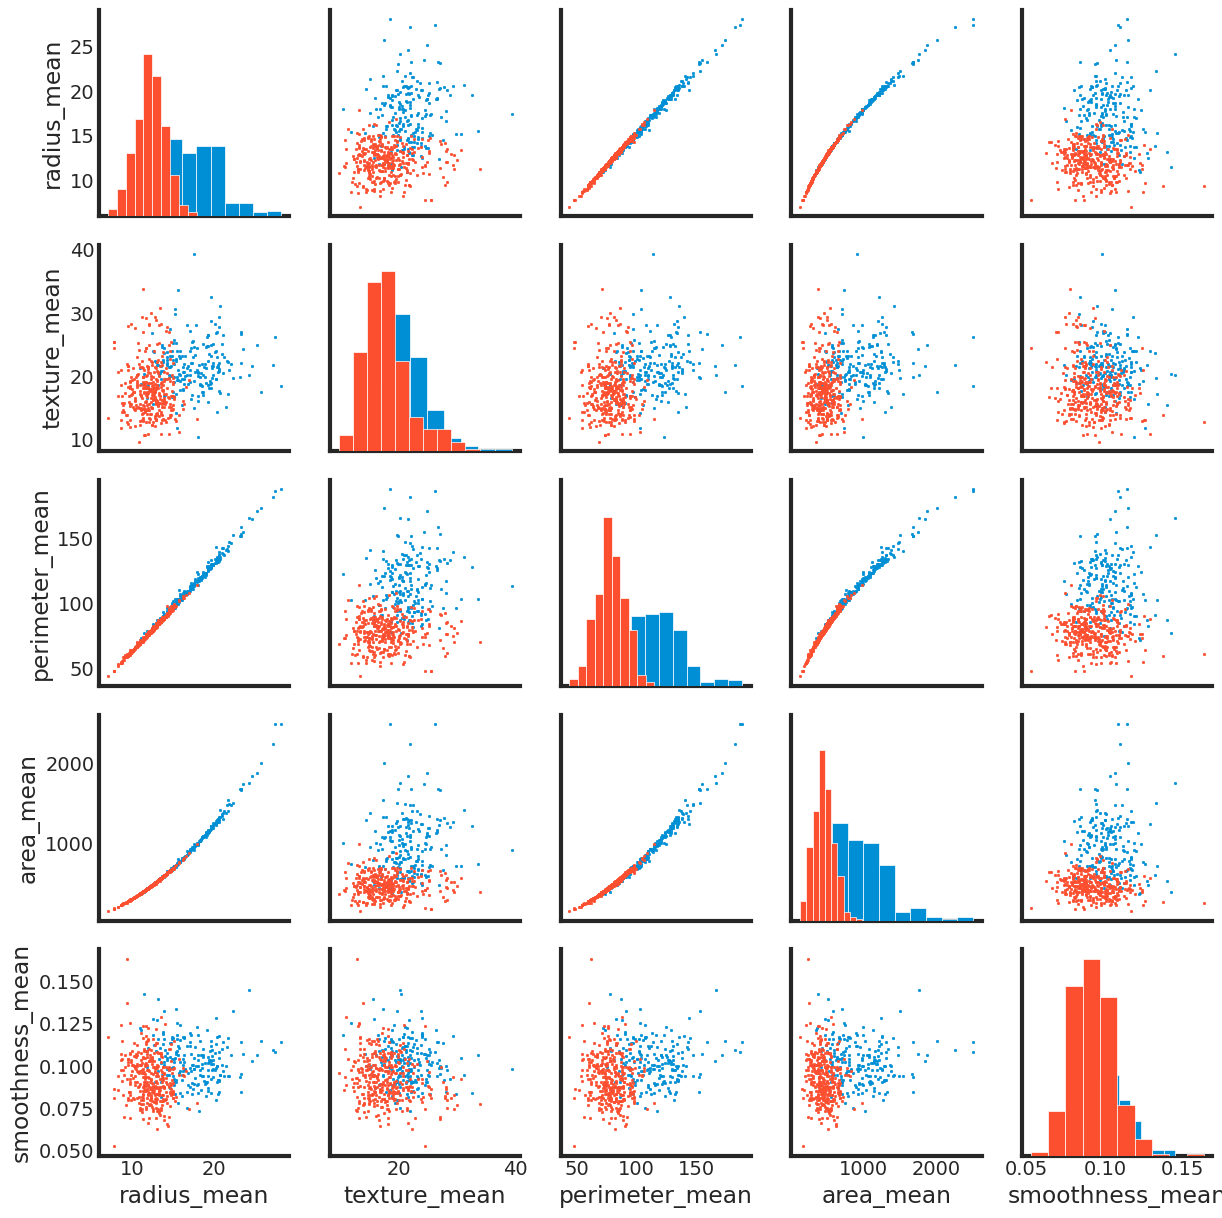

In [40]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.style.use('fivethirtyeight')
sns.set_style("white")

# Update the file path to the correct location
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_clean.csv', index_col=False)
g = sns.PairGrid(df[[df.columns[1],df.columns[2], df.columns[3],
                     df.columns[4], df.columns[5], df.columns[6]]], hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# visualization
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("white")


plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'

# Update the file path to the correct location
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_clean.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [43]:
#Assign predictors to a variable of ndarray (matrix) type
array = df.values
X = array[:,1:31]
y = array[:,0]
X

array([[17.99, 10.38, 122.8, ..., 0.2654, 0.4601, 0.1189],
       [20.57, 17.77, 132.9, ..., 0.186, 0.275, 0.08902],
       [19.69, 21.25, 130.0, ..., 0.243, 0.3613, 0.08758],
       ...,
       [16.6, 28.08, 108.3, ..., 0.1418, 0.2218, 0.0782],
       [20.6, 29.33, 140.1, ..., 0.265, 0.4087, 0.124],
       [7.76, 24.54, 47.92, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [44]:
#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

# Call the transform method of LabelEncorder on two dummy variables
# le.transform (['M', 'B'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [45]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [48]:
# ipython-input-46-7278aff2cbc8

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # Import StandardScaler

#Assign predictors to a variable of ndarray (matrix) type
array = df.values
X = array[:,1:31]
y = array[:,0]

# Assuming 'df' is your DataFrame
# Normalize the data (center around 0 and scale to remove the variance).
scaler = StandardScaler()
Xs = scaler.fit_transform(X)  # Define Xs here

# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

# summarize components
#print("Explained Variance: %s") % fit.explained_variance_ratio_
#print(fit.components_)

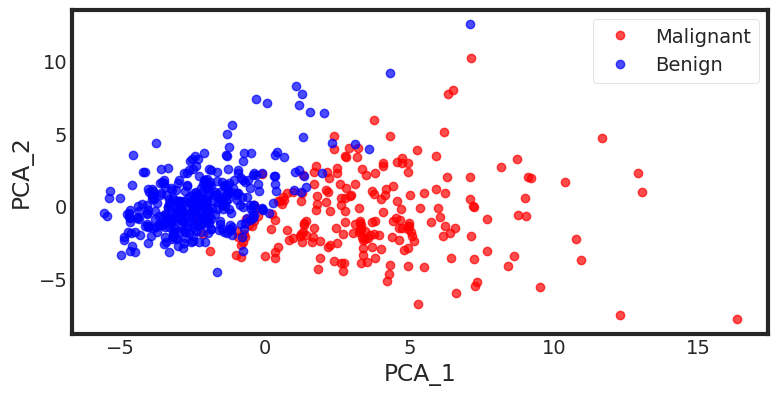

In [49]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][df.diagnosis == 'M'],PCA_df['PCA_2'][df.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][df.diagnosis == 'B'],PCA_df['PCA_2'][df.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()


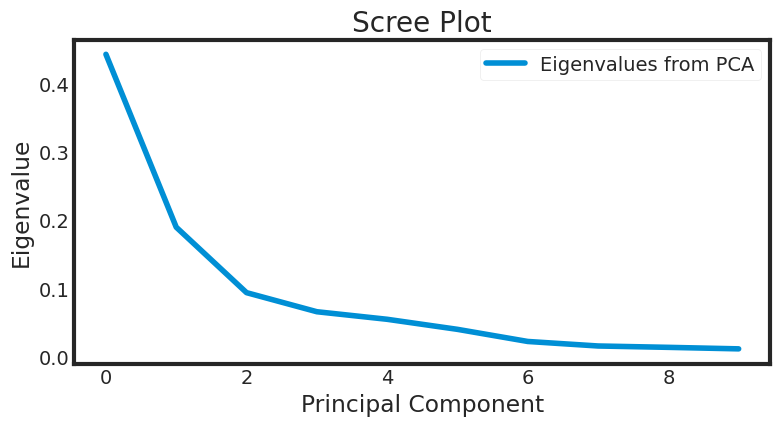

In [51]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)
plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, shadow=False, markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(state=True)
plt.show()

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

# visualization
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'


In [54]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_clean.csv', index_col=False) # Changed file path
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [55]:
#Assign predictors to a variable of ndarray (matrix) type
array = df.values
X = array[:,1:31] # features
y = array[:,0]

#transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize the  data (center around 0 and scale to remove the variance).
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [56]:
# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2, stratify=y)

# Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print ('\n➔ The classifier accuracy score is {:03.2f}\n'.format(classifier_score))


➔ The classifier accuracy score is 0.95



In [57]:
# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print ('\n➔ The {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


➔ The 3-fold cross-validation accuracy score for this classifier is 0.97



In [58]:
from sklearn.feature_selection import SelectKBest, f_regression
clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))

scores = cross_val_score(clf2, Xs, y, cv=3)

# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print ('\n➔ The {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


➔ The 3-fold cross-validation accuracy score for this classifier is 0.97



In [59]:
print (scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print ("➔ Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

[0.93157895 0.95263158 0.94179894]
➔ Average score and uncertainty: (94.20 +- 0.496)%


In [60]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm

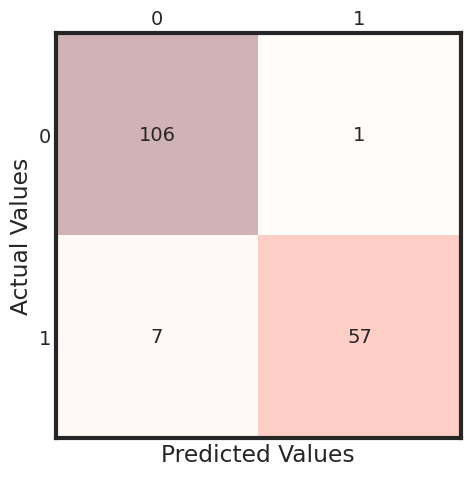

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

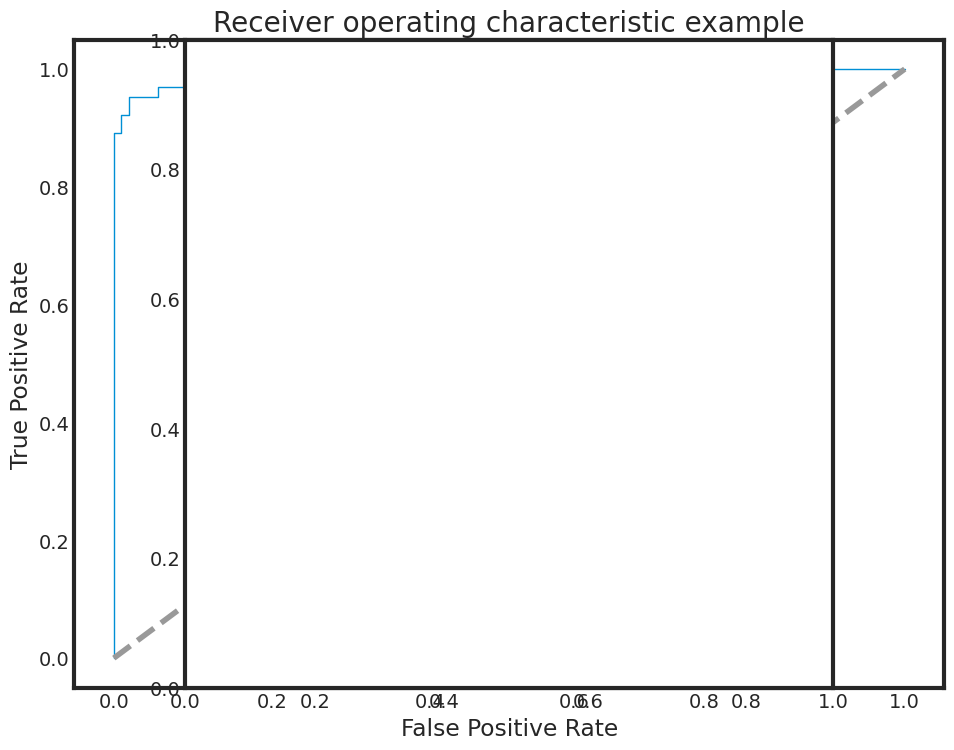

In [62]:
from sklearn.metrics import roc_curve, auc

# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.axes().set_aspect(1)

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression

# visualization
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'

In [64]:
X

array([[17.99, 10.38, 122.8, ..., 0.2654, 0.4601, 0.1189],
       [20.57, 17.77, 132.9, ..., 0.186, 0.275, 0.08902],
       [19.69, 21.25, 130.0, ..., 0.243, 0.3613, 0.08758],
       ...,
       [16.6, 28.08, 108.3, ..., 0.1418, 0.2218, 0.0782],
       [20.6, 29.33, 140.1, ..., 0.265, 0.4087, 0.124],
       [7.76, 24.54, 47.92, ..., 0.0, 0.2871, 0.07039]], dtype=object)


The classifier accuracy score is 0.96

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



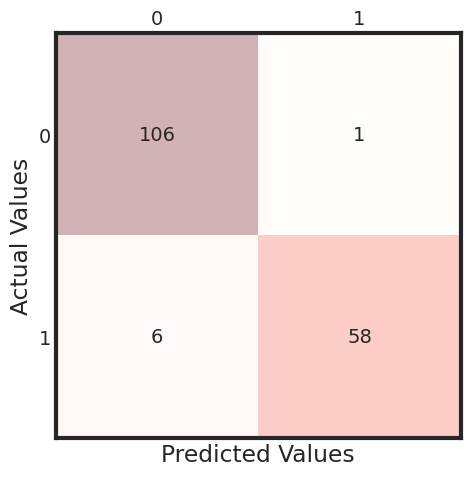

In [67]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_clean.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)

# Assign predictors to a variable of ndarray (matrix) type
array = df.values
X = array[:,1:31]
y = array[:,0]

# Transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)
X_pca = pca.transform(Xs)

# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=2, stratify=y)

# Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print ('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))

clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))
scores = cross_val_score(clf2, X_pca, y, cv=3)

# Get average of 5-fold cross-validation score using an SVC estimator.
n_folds = 5
cv_error = np.average(cross_val_score(SVC(), X_pca, y, cv=n_folds))
#print ('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))

y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

In [68]:
# Train classifiers.
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6),'kernel': kernel_values}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [69]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'} with a score of 0.98


In [70]:
grid.best_estimator_.probability = True
clf = grid.best_estimator_

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



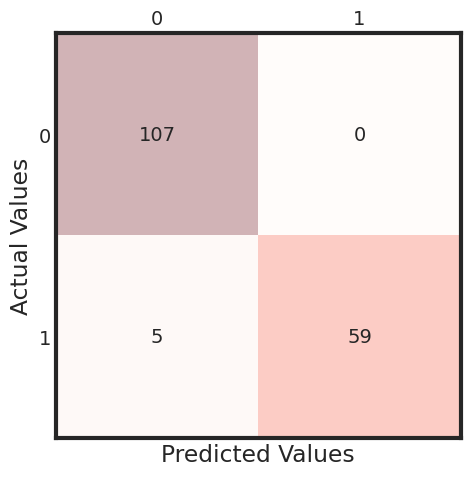

In [71]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

In [72]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets

def decision_plot(X_train, y_train, n_neighbors, weights):
       h = .02  # step size in the mesh

Xtrain = X_train[:, :2] # we only take the first two features.

#================================================================
# Create color maps
#================================================================
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


#================================================================
# we create an instance of SVM and fit out data.
# We do not scale ourdata since we want to plot the support vectors
#================================================================

C = 1.0  # SVM regularization parameter

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(Xtrain, y_train)

In [73]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.rcParams['axes.titlesize'] = 'large'

    # create a mesh to plot in
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

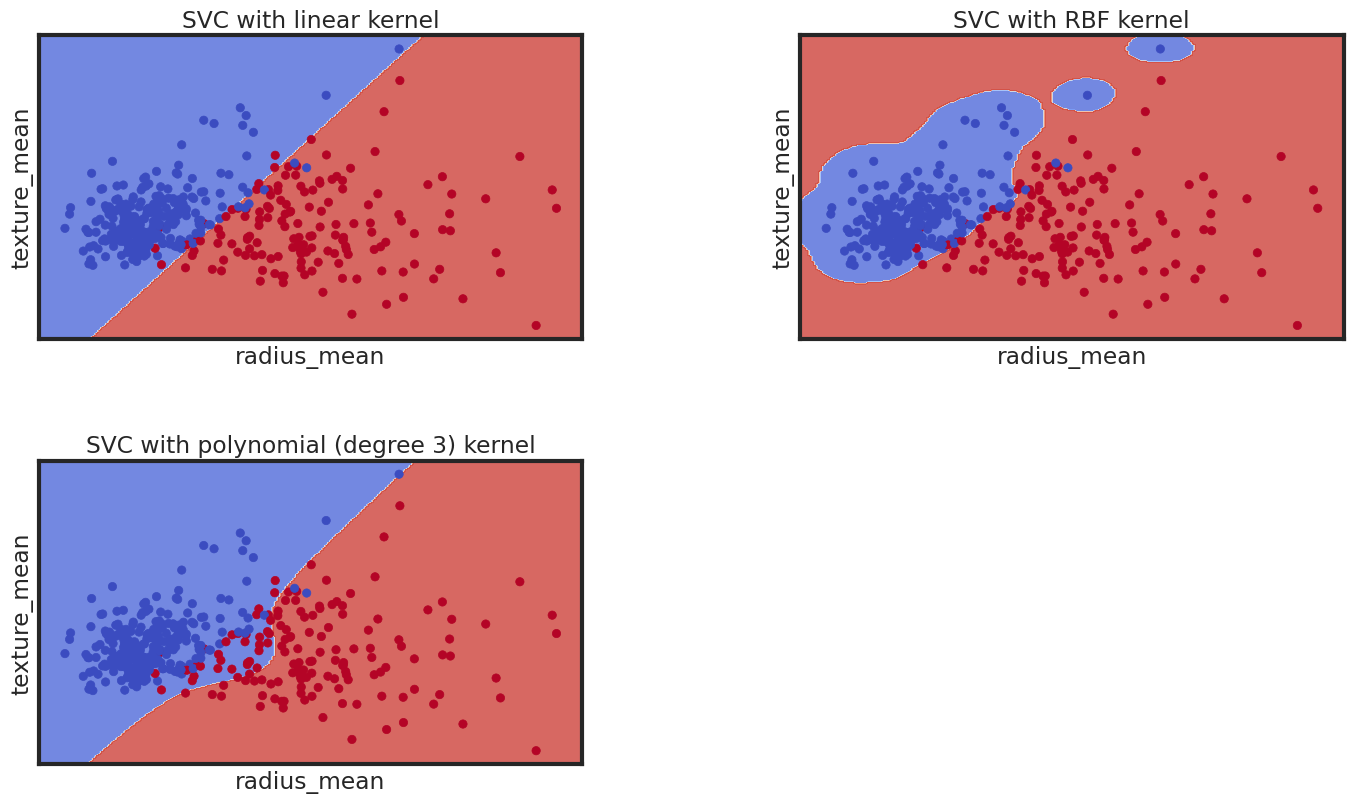

In [74]:
for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create a pipeline that standardizes the data then creates a model
#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# visualization
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'

In [77]:
#load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_clean.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)

# Split-out validation dataset
array = df.values
X = array[:,1:31]
y = array[:,0]

# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

In [78]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print('\n➔ 10-Fold cross-validation accurcay score for the training data for six classifiers')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.942244 (0.025053)
LDA: 0.954744 (0.018784)
KNN: 0.937179 (0.028218)
CART: 0.922115 (0.034444)
NB: 0.937115 (0.040822)
SVM: 0.901987 (0.047020)

➔ 10-Fold cross-validation accurcay score for the training data for six classifiers


In [79]:
len(X_train)

398

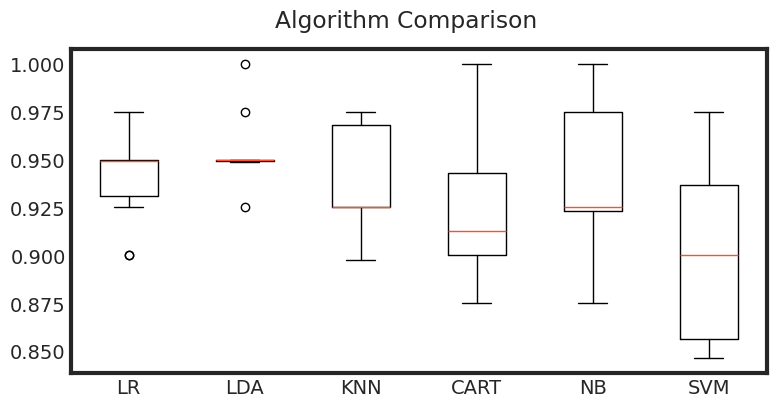

In [80]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [81]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
      scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.974936 (0.015813)
ScaledLDA: 0.954744 (0.018784)
ScaledKNN: 0.957372 (0.033665)
ScaledCART: 0.919679 (0.035054)
ScaledNB: 0.937115 (0.039261)
ScaledSVM: 0.967436 (0.027483)


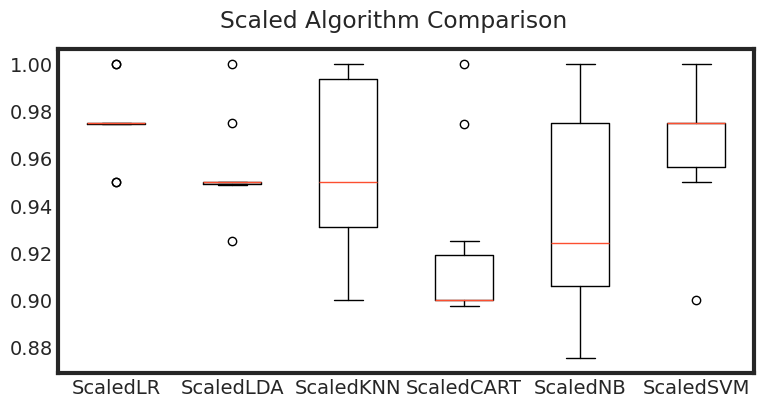

In [82]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [83]:
#Make Support Vector Classifier Pipeline
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True, verbose=False))])

#Fit Pipeline to training Data
pipe_svc.fit(X_train, y_train)

#print('➝ Fitted Pipeline to training Data')

scores = cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0)
print('➔ Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=1)
gs = gs.fit(X_train, y_train)
print('➔ Tuned Parameters Best Score: ',gs.best_score_)
print('➔ Best Parameters: \n',gs.best_params_)

➔ Model Training Accuracy: 0.940 +/- 0.034
➔ Tuned Parameters Best Score:  0.9446794871794871
➔ Best Parameters: 
 {'clf__C': 1.0, 'clf__kernel': 'linear'}


In [84]:
from sklearn.neighbors import KNeighborsClassifier as KNN

pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', KNeighborsClassifier())])

#Fit Pipeline to training Data
pipe_knn.fit(X_train, y_train)

scores = cross_val_score(estimator=pipe_knn,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('➝ Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = range(1, 31)
param_grid = [{'clf__n_neighbors': param_range}]
# instantiate the grid
gs = GridSearchCV(estimator=pipe_knn,
                    param_grid=param_grid,
                    cv=10,
                    scoring='accuracy')
gs = gs.fit(X_train, y_train)
print('➔ Tuned Parameters Best Score: ',gs.best_score_)
print('➔ Best Parameters: \n',gs.best_params_)

➝ Model Training Accuracy: 0.927 +/- 0.044
➔ Tuned Parameters Best Score:  0.9396153846153847
➔ Best Parameters: 
 {'clf__n_neighbors': 19}


In [86]:
#Use best parameters
clf_svc = gs.best_estimator_

#Get Final Scores
clf_svc.fit(X_train, y_train)
scores = cross_val_score(estimator=clf_svc,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

print('➔ Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('➜ Final Accuracy on Test set: %.5f' % clf_svc.score(X_test,y_test))

➔ Final Model Training Accuracy: 0.940 +/- 0.034
➜ Final Accuracy on Test set: 0.94737


In [87]:
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9473684210526315
[[113   3]
 [  6  49]]
              precision    recall  f1-score   support

           B       0.95      0.97      0.96       116
           M       0.94      0.89      0.92        55

    accuracy                           0.95       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171

